In [1]:
import yfinance as yf
import lxml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bolsas=pd.read_excel('stocks.xlsx',nrows=27)

In [3]:
todas_bolsas=bolsas.Ticker

In [4]:
referencia=[]

dados=pd.DataFrame(yf.Ticker(todas_bolsas[0]).history(period='max').Close.loc['December 31 2018':'December 31 2019'])
referencia.append(dados.iloc[0])
dados.columns=[todas_bolsas[0]] 

for i in todas_bolsas[1:len(todas_bolsas)]:
    n_dados=pd.DataFrame(yf.Ticker(i).history(period='max').Close.loc['December 31 2018':'December 31 2019'])
    referencia.append(n_dados.iloc[0])
    n_dados.columns=[i]
    dados=pd.merge(dados,n_dados, how='outer',left_index=True, right_index=True)

In [5]:
dados_transformados=pd.DataFrame()

for i in range(len(todas_bolsas)):
    dados_transformados[todas_bolsas[i]]=dados.iloc[:,i]*100/referencia[i].values

In [6]:
mercados=[bolsas[bolsas.Market==mercado].Ticker for mercado in bolsas.Market.unique()]
regioes=[bolsas[bolsas.Region==regiao].Ticker for regiao in bolsas.Region.unique()]

Economias avançadas / Emergentes


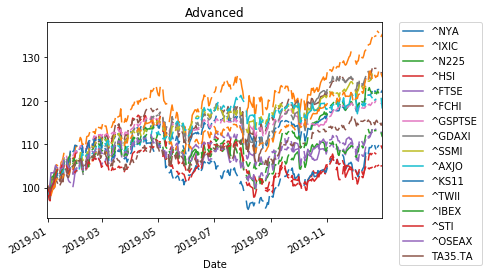

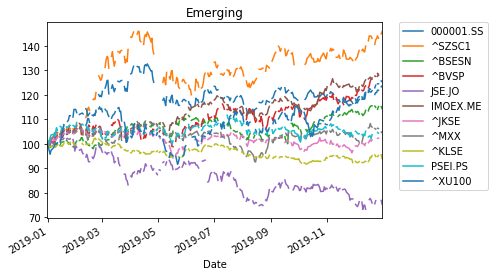

In [7]:
print('Economias avançadas / Emergentes')
for i in range(len(mercados)):
    dados_transformados[mercados[i]].plot()
    plt.title(bolsas.Market.unique()[i])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
plt.show()

Por Região


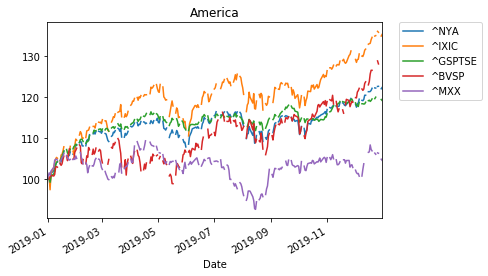

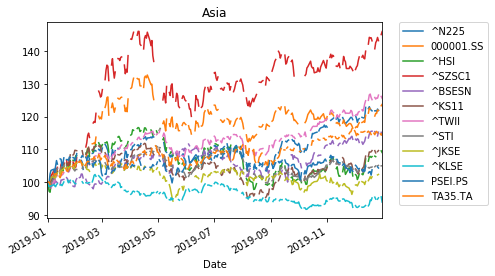

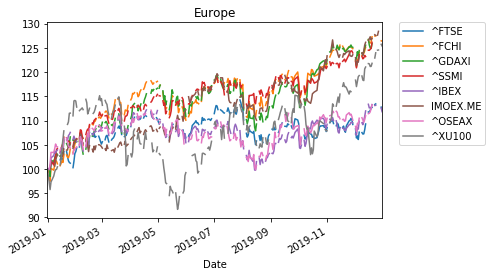

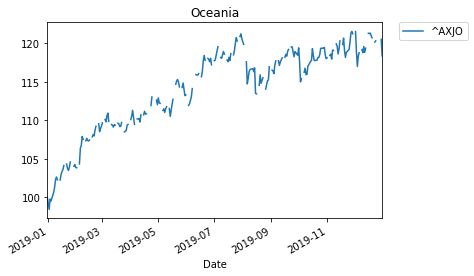

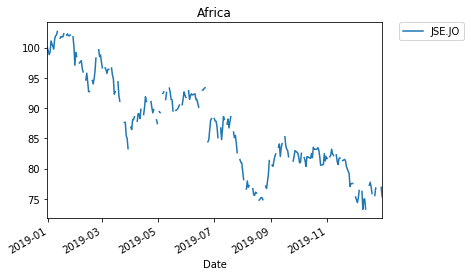

In [8]:
print('Por Região')
for i in range(len(regioes)):
    dados_transformados[regioes[i]].plot()
    plt.title(bolsas.Region.unique()[i])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [9]:
pd.DataFrame({coluna:dados_transformados[coluna].dropna().iloc[-1] for coluna in dados_transformados.columns}.items(),
            columns=['Ticker','Multiplicador']).sort_values('Multiplicador',ascending=False).merge(
            bolsas[['Exchange','Country','Ticker']])

,Ticker,Multiplicador,Exchange,Country
0,^SZSC1,145.900403,Shenzhen Stock Exchange,China
1,^IXIC,135.225642,Nasdaq - US,United States
2,IMOEX.ME,128.214767,Moscow Exchange,Russia
3,^BVSP,127.416165,B3 - Brasil Bolsa Balcão,Brazil
4,^FCHI,126.367612,Euronext Paris,France
5,^TWII,125.570067,Taiwan Stock Exchange,Taiwan
6,^SSMI,125.406656,SIX Swiss Exchange,Switzerland
7,^XU100,125.369095,Borsa Istanbul,Turkey
8,^GDAXI,125.224689,Deutsche Boerse AG,Germany
9,000001.SS,123.722564,Shanghai Stock Exchange,China
